# Caso de uso 3 - Naive Bayes
Se deben analizar los sentimientos de un archivo CSV de 50,000 entradas. Se debe utilizar Naive Bayes para poder resolver el problema.

### Paso 0. Descargar el dataset
Descarga el dataset [aquí](https://uvggt-my.sharepoint.com/:x:/g/personal/oro251162_uvg_edu_gt/EXSyOpVNdG9ArZec2SMyrdcBQSxTItQ-l7IJUZjDq0dYiA?e=OCQ1c2).

### Paso 1. Cargar el dataset
Importar las librerías necesarias y cargar el archivo CSV.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [54]:
df = pd.read_csv("imdb_reviews.csv")

### Paso 2. Análisis exploratorio del dataset
Conocer el dataset con el que se trabajará.

In [55]:
df. shape

(50000, 2)

In [56]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [59]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [60]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Paso 3. Separar variables
Seleccionar las columnas de review como **X** y sentiment como **y**.

In [61]:
X = df["review"]
y = df["sentiment"]

### Paso 4. Dividir en entrenamiento y prueba
Usar train_test_split para separar el dataset en 70% de entrenamiento y 30% de prueba.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 999)

### Paso 5. Transormar texto a vectores
Procesar las opiniones en vectores para que el modelo pueda trabajar con ellos.

In [50]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Paso 6. Entrenar el modelo Naive Bayes
Crear el modelo MultinomialNB (para frecuencias) y entrenarlo.

In [67]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### Paso 7. Evaluar el modelo
Calcular la precisión y mostrar matriz de confusión.

In [52]:
y_pred = model.predict(X_test_vec)

In [53]:
print("Precisión del modelo: ", accuracy_score(y_test, y_pred))

Precisión del modelo:  0.8486


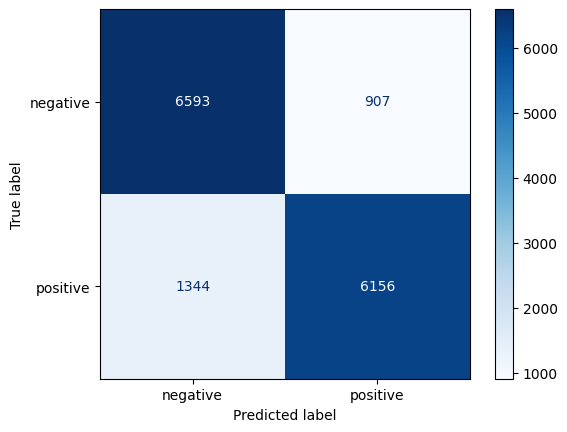

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

In [68]:
reporte = classification_report(y_test, y_pred, output_dict=True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
negative,0.827844,0.881626,0.853889,7527.000000
positive,0.872423,0.815335,0.842913,7473.000000
accuracy,0.848600,0.848600,0.848600,0.848600
macro avg,0.850133,0.848481,0.848401,15000.000000
weighted avg,0.850053,0.848600,0.848421,15000.000000


### Paso 8. Predecir una nueva reseña
Se le solicita al usuario una nueva reseña y el modelo lo clasifica.

In [78]:
frase = input("Escribe una reseña: ")
frase_vec = vectorizer.transform([frase])
prediccion = model.predict(frase_vec)
print("La frase se clasifica como:", prediccion[0])

Escribe una reseña:  holy cow


La frase se clasifica como: negative
